In [ ]:
!pip install openpyxl
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from lazypredict.Supervised import LazyRegressor

In [ ]:
# Load your dataset from Excel
file_path = '/content/Data_regression.xlsx'
df = pd.read_excel(file_path)

In [ ]:
# Shuffle the DataFrame rows randomly
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,Configuaration,Vi,SPE
0,AA,6.53,77.32
1,AA,4.51,36.61
2,AB,4.61,38.20
3,AB,2.46,10.49
4,AB,6.81,82.22


In [ ]:
# Indentifying Input features (X), and Responses (y1, y2, and y3)
X = df[['Configuaration', 'Vi']]
y = df['SPE']

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42)

In [ ]:
# Identify categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

categorical_features = ['Configuaration']

# Preprocessing categorical features with one-hot encoding
# Preprocessing continuous features with StandarScaler (z-score)
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scale', StandardScaler(), ['Vi'])
])

In [ ]:
# Transform input features
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
X_val_transformed = preprocessor.transform(X_val)

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

# Initialize LazyRegressor
lazy_reg = LazyRegressor()

# Fit and evaluate models for y
y_models, y_preds = lazy_reg.fit(X_train_transformed, X_test_transformed, y_train, y_test)
print("Results for Fstrength:\n", y_models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 259, number of used features: 3
[LightGBM] [Info] Start training from score 49.042852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model
gbr_model = GradientBoostingRegressor(random_state=42)

In [ ]:
# Define hyperparameter grid
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
# Grid search with cross-validation
gbr_grid = GridSearchCV(gbr_model, param_grid_gbr, cv=5, scoring='r2', n_jobs=-1)

In [ ]:
# Fit the model
gbr_grid.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2')

In [ ]:
# Evaluate with 5-fold cross-validation
gbr_cv_scores = cross_val_score(gbr_grid.best_estimator_, X_train_transformed, y_train, cv=5, scoring='r2')

print("Gradient Boosting Regressor CV Scores:", gbr_cv_scores)
print("Best Hyperparameters for GBR:", gbr_grid.best_params_)
print("Best Score from Grid Search:", gbr_grid.best_score_)

Gradient Boosting Regressor CV Scores: [0.99681198 0.99892136 0.99732329 0.9984086  0.99936828]
Best Hyperparameters for GBR: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100, 'subsample': 0.6}
Best Score from Grid Search: 0.9981667016773598


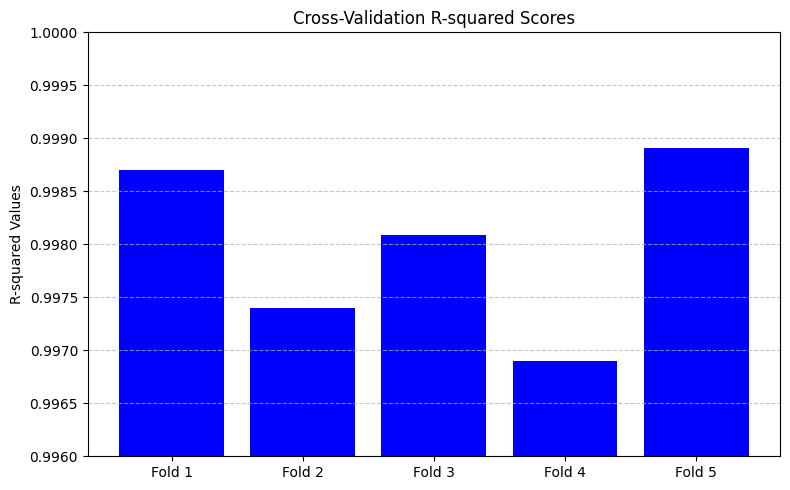

In [ ]:
import matplotlib.pyplot as plt

# R-squared values
r_squared_values = [0.99870479, 0.99739829, 0.99808978, 0.99690022, 0.99890508]

# X-axis labels
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(folds, r_squared_values, color='blue')
plt.ylim(0.996, 1.0)
plt.ylabel('R-squared Values')
plt.title('Cross-Validation R-squared Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Predict on test and validation data
y_pred_gbr_test = gbr_grid.best_estimator_.predict(X_test_transformed)
y_pred_gbr_val = gbr_grid.best_estimator_.predict(X_val_transformed)

# Compute relative errors
relative_error_gbr_train = (gbr_grid.best_estimator_.predict(X_train_transformed) - y_train) / y_train
relative_error_gbr_test = (y_pred_gbr_test - y_test) / y_test
relative_error_gbr_val = (y_pred_gbr_val - y_val) / y_val

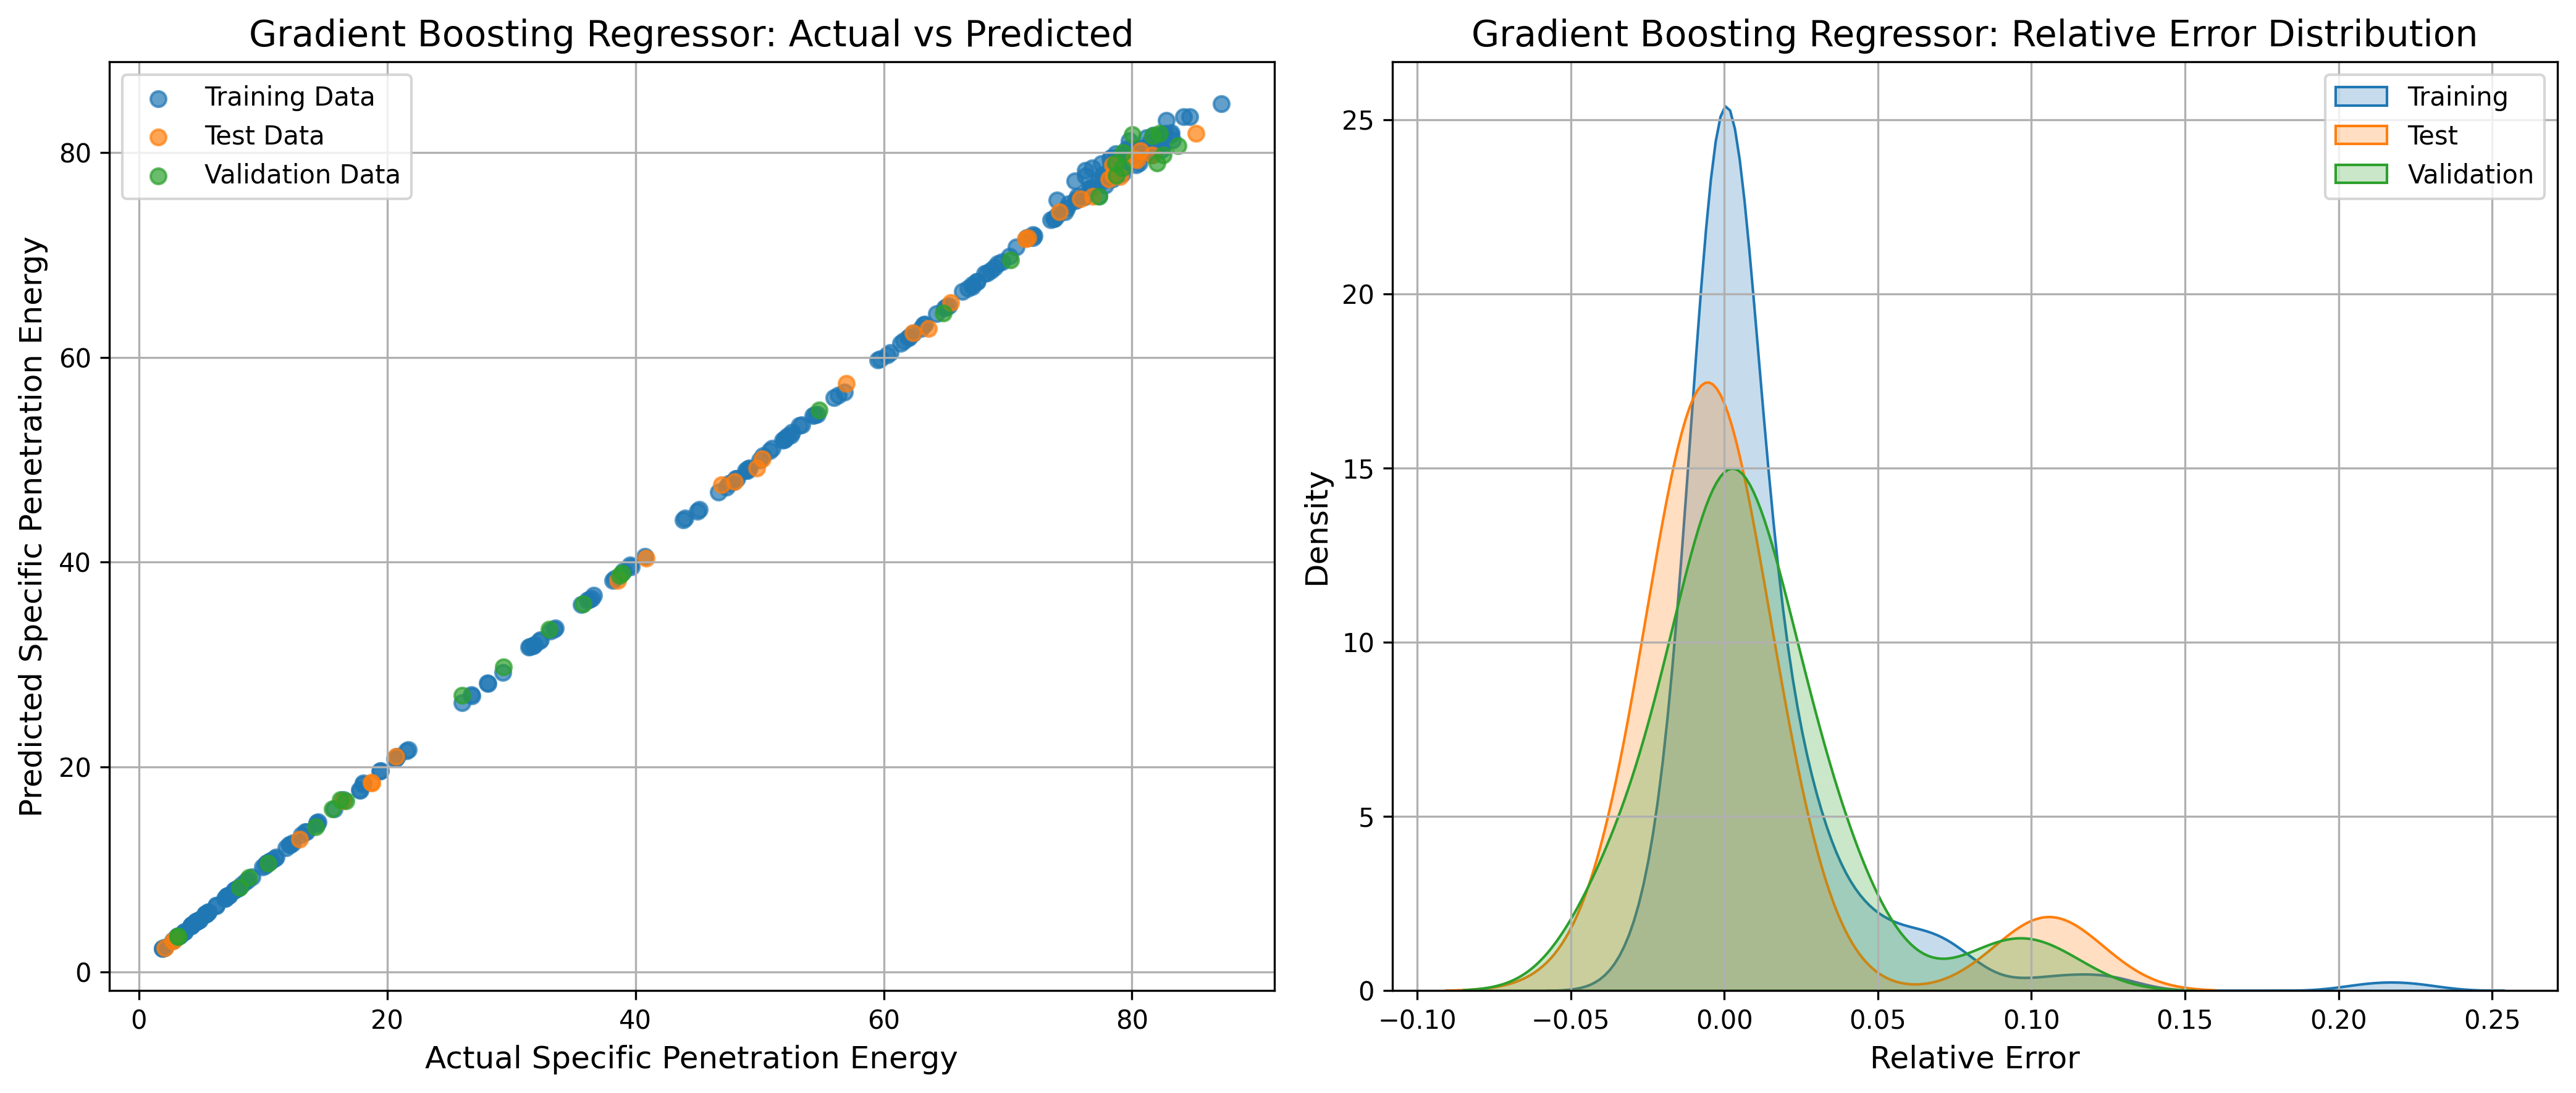

In [ ]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=300)

# Actual vs Predicted Plot
axes[0].scatter(y_train, gbr_grid.best_estimator_.predict(X_train_transformed), label='Training Data', alpha=0.7)
axes[0].scatter(y_test, y_pred_gbr_test, label='Test Data', alpha=0.7)
axes[0].scatter(y_val, y_pred_gbr_val, label='Validation Data', alpha=0.7)
axes[0].set_xlabel('Actual Specific Penetration Energy', fontsize=12)
axes[0].set_ylabel('Predicted Specific Penetration Energy', fontsize=12)
axes[0].set_title('Gradient Boosting Regressor: Actual vs Predicted', fontsize=14)
axes[0].legend()
axes[0].grid(True)

# KDE Plot of Relative Errors
sns.kdeplot(relative_error_gbr_train, label='Training', fill=True, ax=axes[1])
sns.kdeplot(relative_error_gbr_test, label='Test', fill=True, ax=axes[1])
sns.kdeplot(relative_error_gbr_val, label='Validation', fill=True, ax=axes[1])
axes[1].set_xlabel('Relative Error', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Gradient Boosting Regressor: Relative Error Distribution', fontsize=14)
axes[1].legend()
axes[1].grid(True)

plt.savefig("GradientBoostingRegressor_Plots.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [ ]:
# Load your dataset from Excel
file_path2 = '/content/Data_classification.xlsx'
df2 = pd.read_excel(file_path2)

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [ ]:
# Encode categorical features
label_encoder = LabelEncoder()
df2['Configurations'] = label_encoder.fit_transform(df2['Configurations'])

In [ ]:
# Features and target
X2 = df2[['Configurations', 'Vi']]
y2 = df2['Labels']

In [ ]:
# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=42)


In [ ]:
# Initialize and run LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train2, X_test2, y_train2, y_test2)

print("Results:\n", models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 68
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 2
[LightGBM] [Info] Start training from score -0.586049
[LightGBM] [Info] Start training from score -1.587932
[LightGBM] [Info] Start training from score -1.774518
[LightGBM] [Info] Start training from score -2.665491
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [ ]:
pip install pandas scikit-learn lightgbm openpyxl

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

In [ ]:
# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


Fold 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 204, number of used features: 2
[LightGBM] [Info] Start training from score -0.599621
[LightGBM] [Info] Start training from score -1.580450
[LightGBM] [Info] Start training from score -1.762772
[LightGBM] [Info] Start training from score -2.610070
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

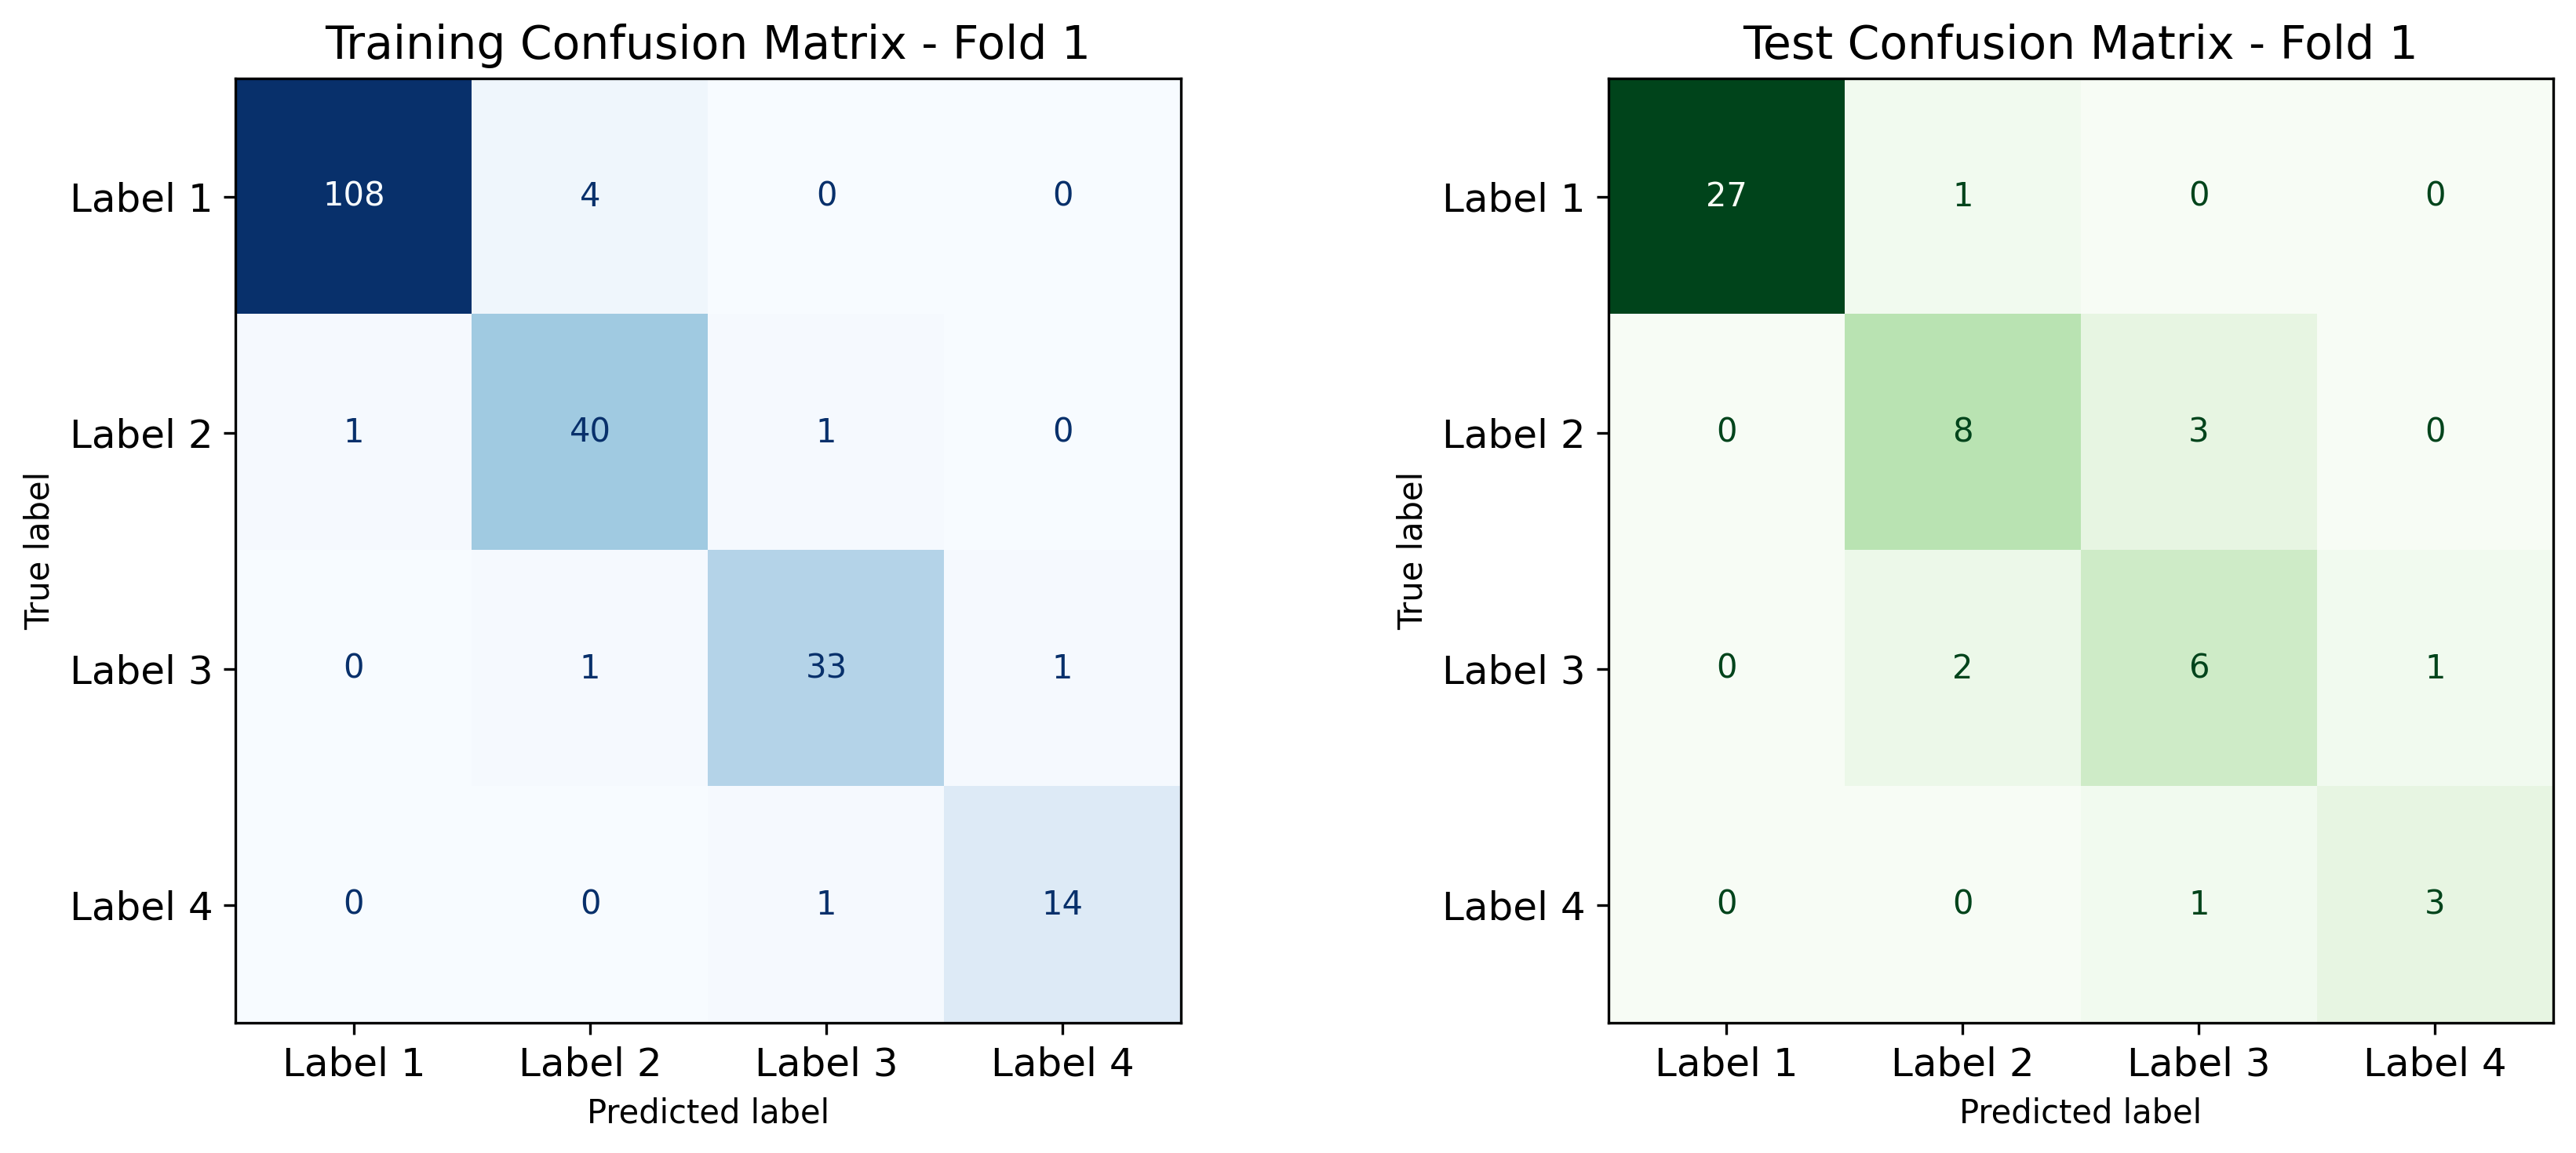


Fold 2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 61
[LightGBM] [Info] Number of data points in the train set: 205, number of used features: 2
[LightGBM] [Info] Start training from score -0.604511
[LightGBM] [Info] Start training from score -1.585340
[LightGBM] [Info] Start training from score -1.767662
[LightGBM] [Info] Start training from score -2.550421
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

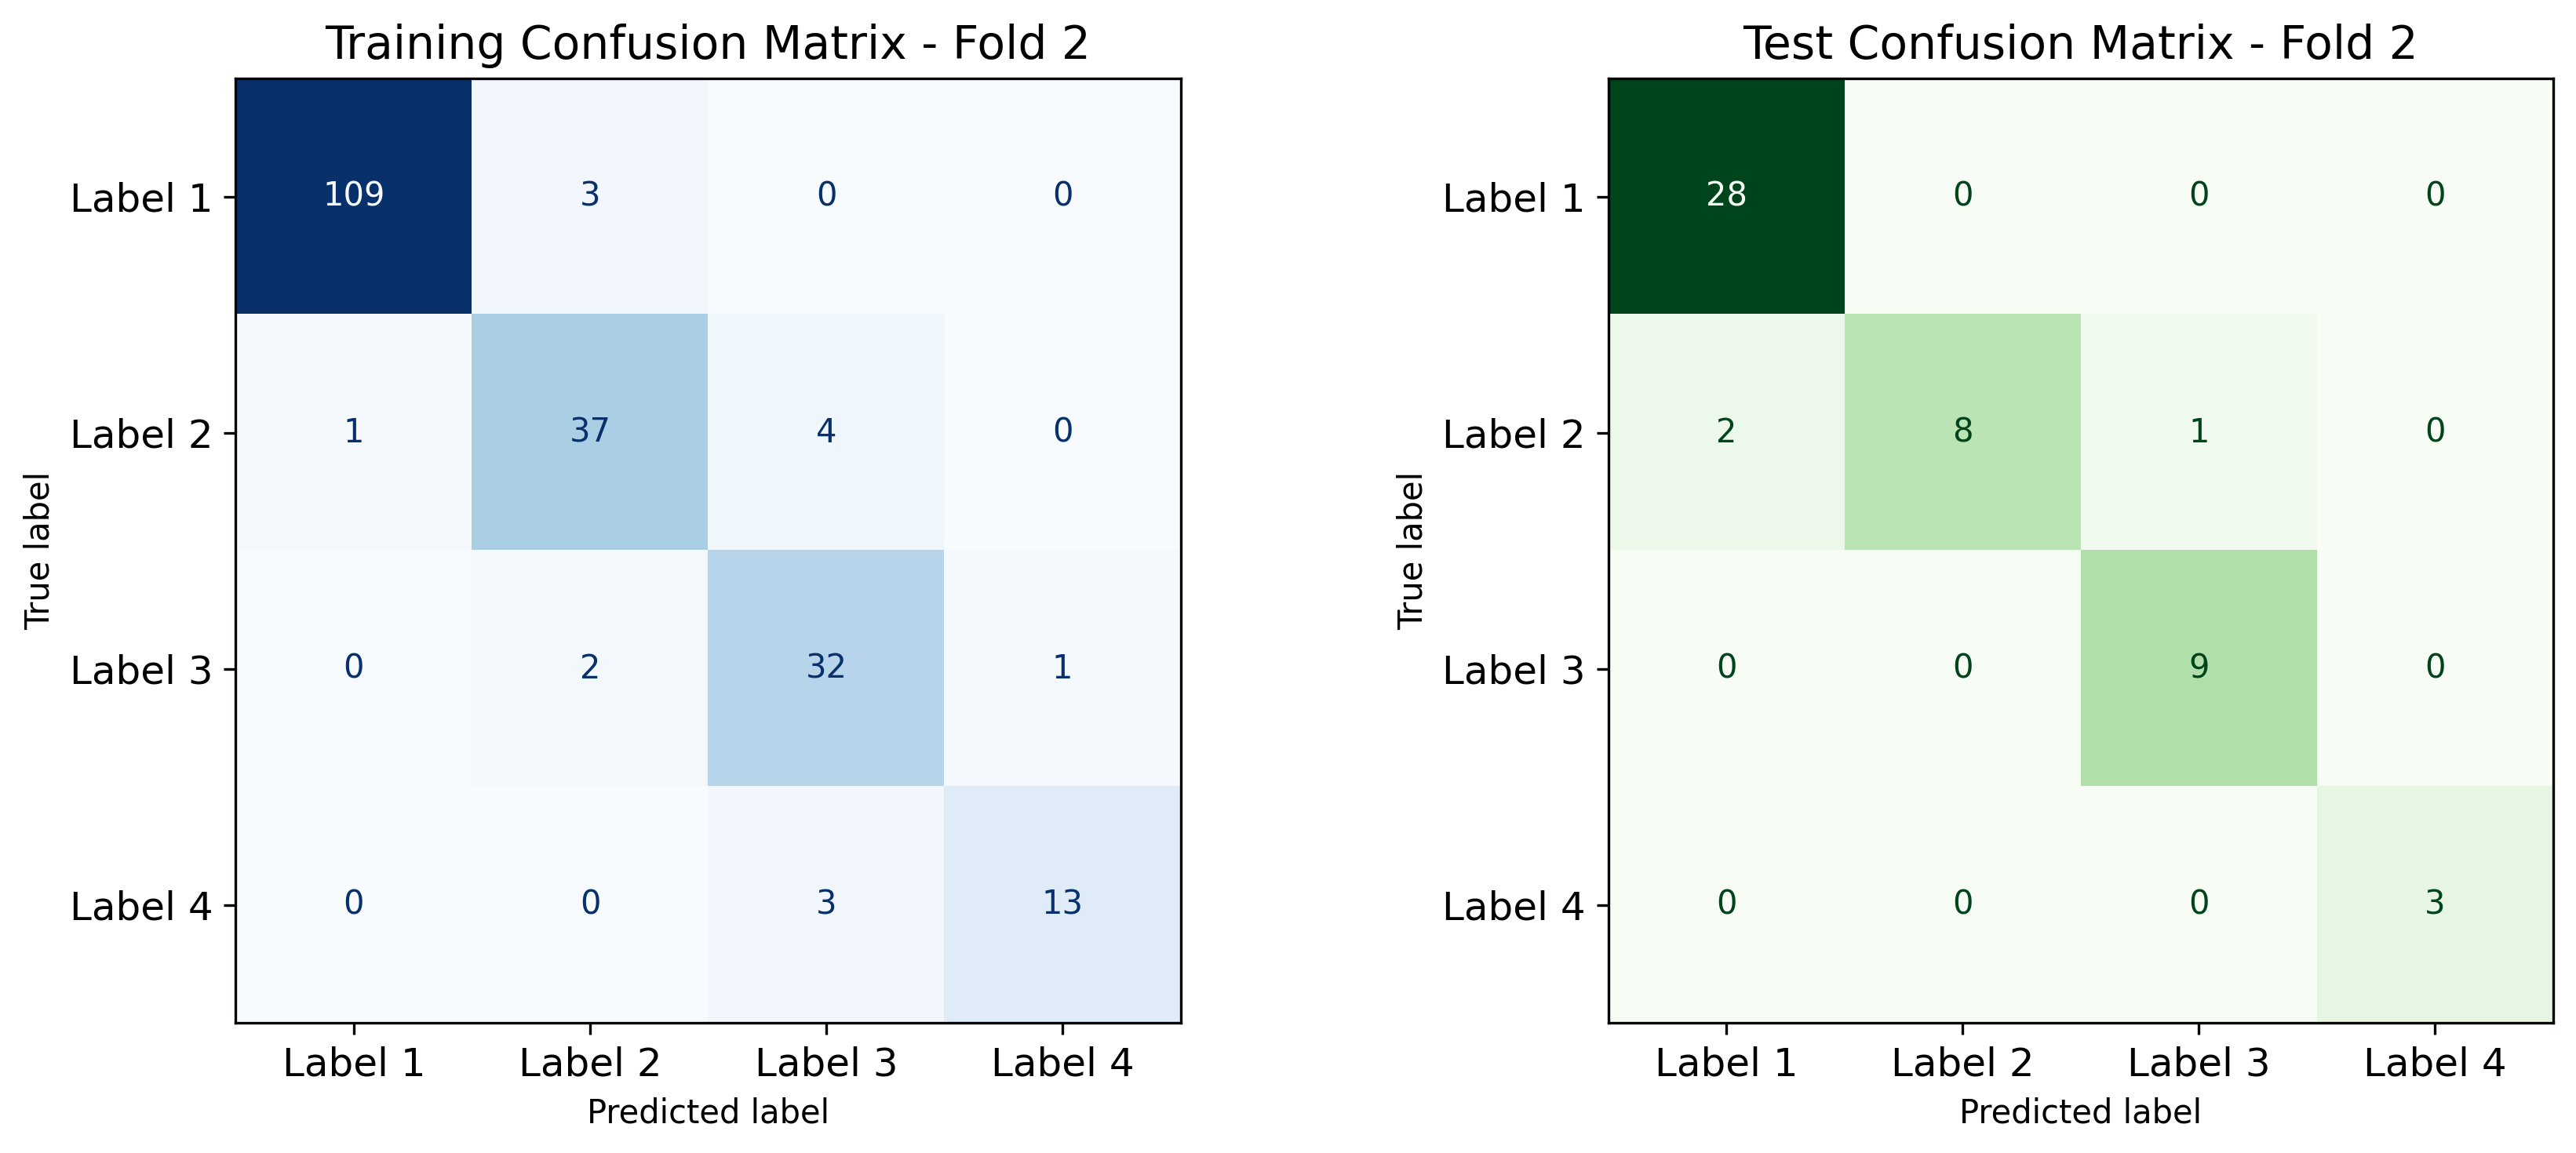


Fold 3
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 205, number of used features: 2
[LightGBM] [Info] Start training from score -0.604511
[LightGBM] [Info] Start training from score -1.585340
[LightGBM] [Info] Start training from score -1.739491
[LightGBM] [Info] Start training from score -2.614960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

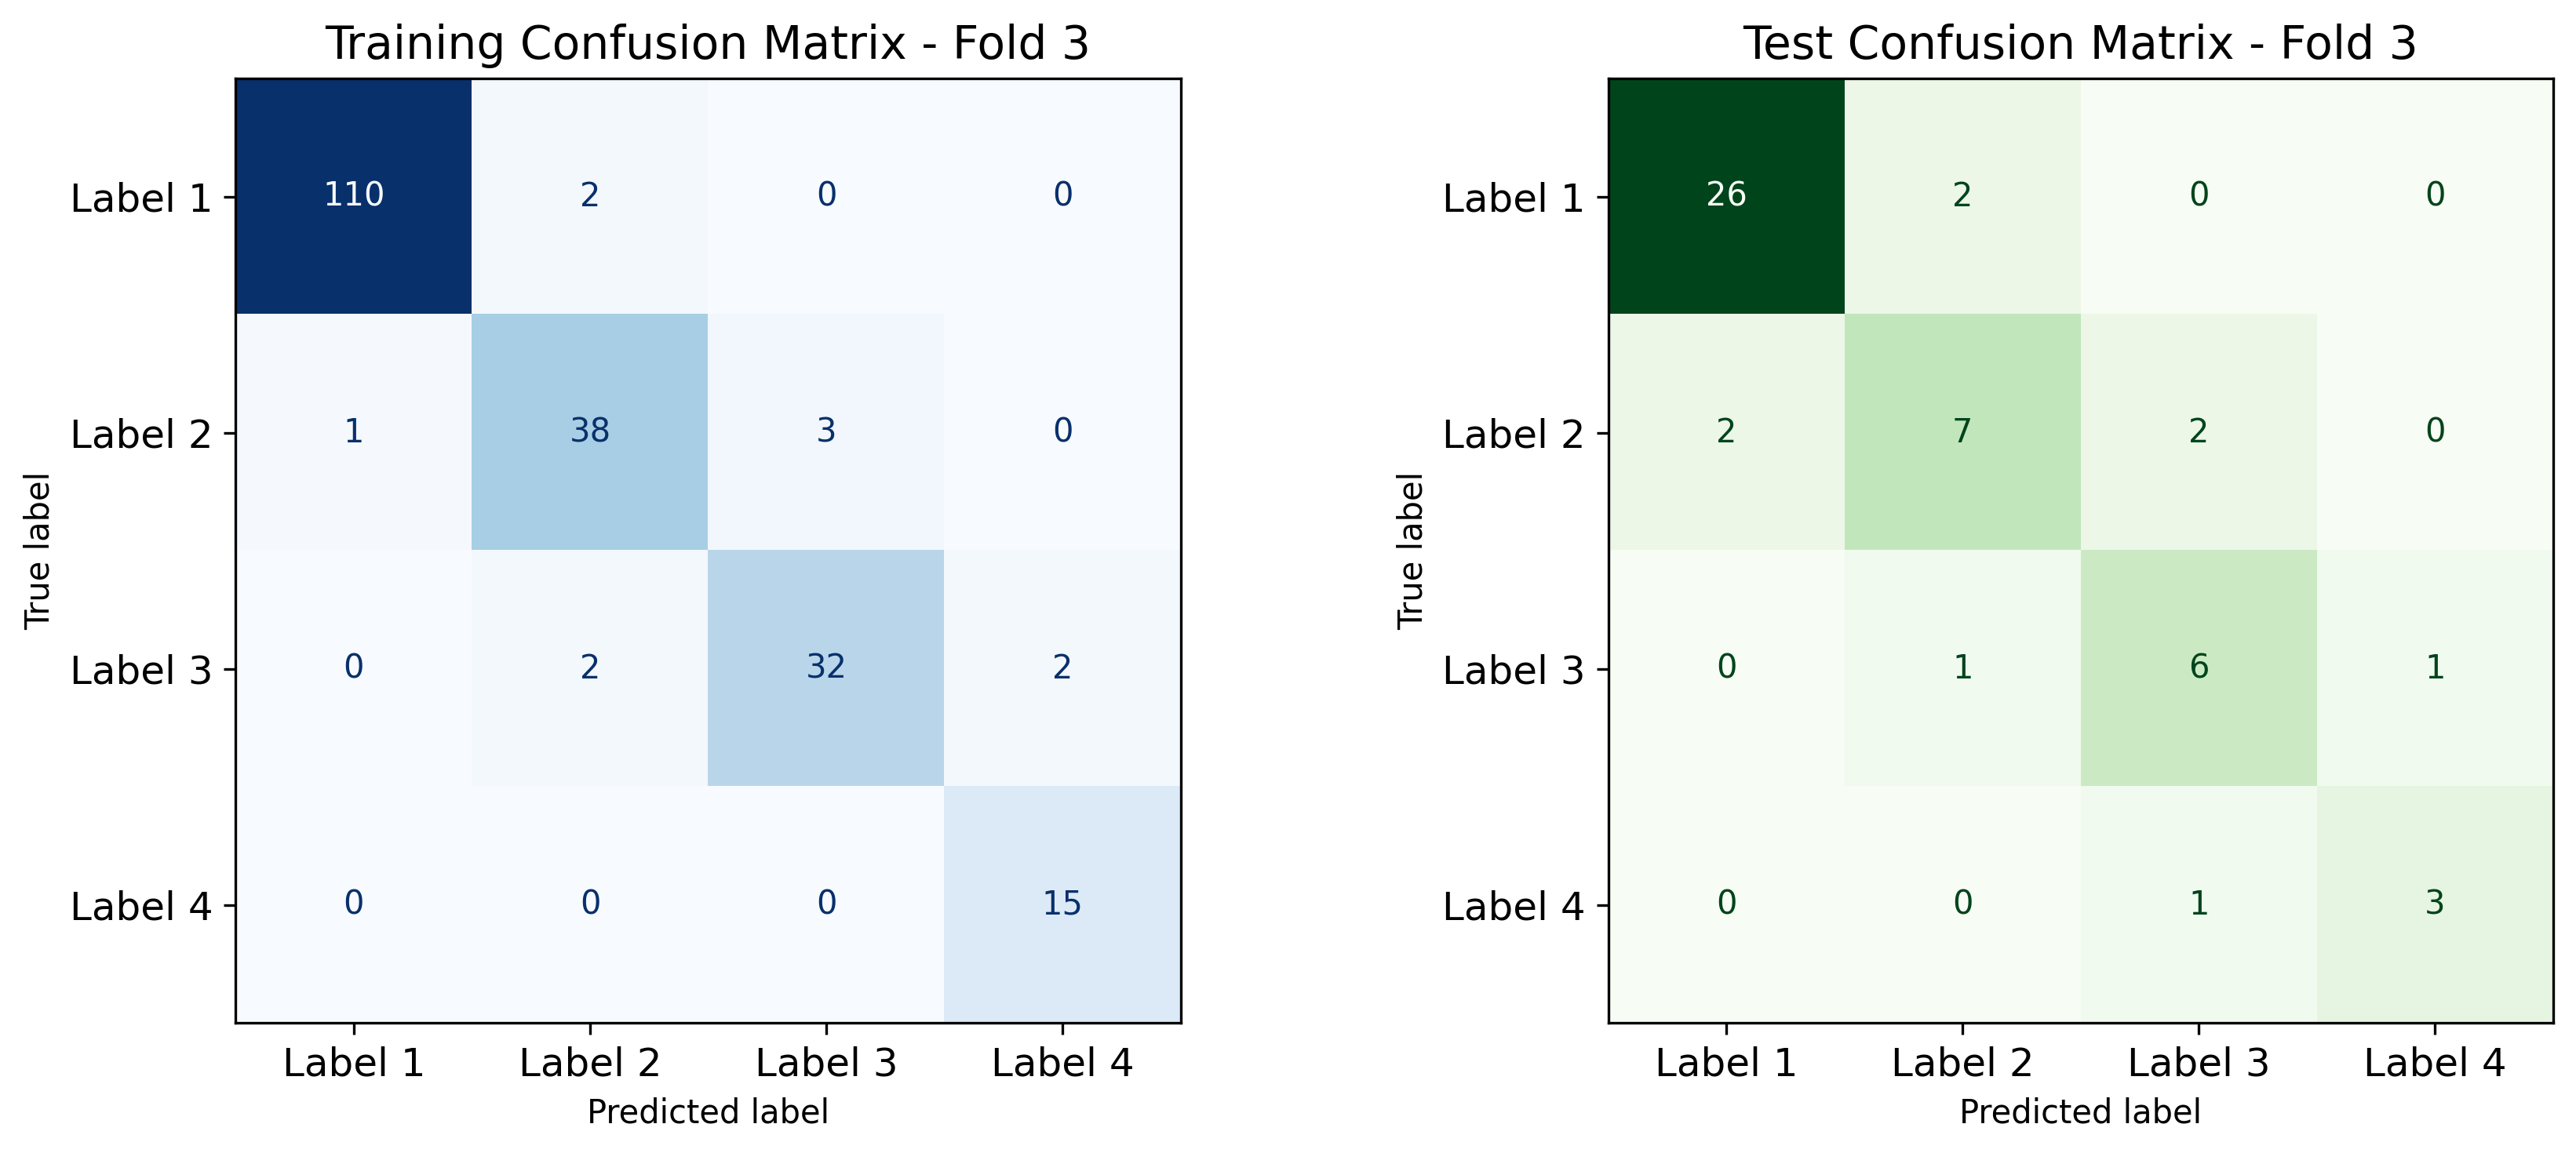


Fold 4
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 205, number of used features: 2
[LightGBM] [Info] Start training from score -0.604511
[LightGBM] [Info] Start training from score -1.561810
[LightGBM] [Info] Start training from score -1.767662
[LightGBM] [Info] Start training from score -2.614960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

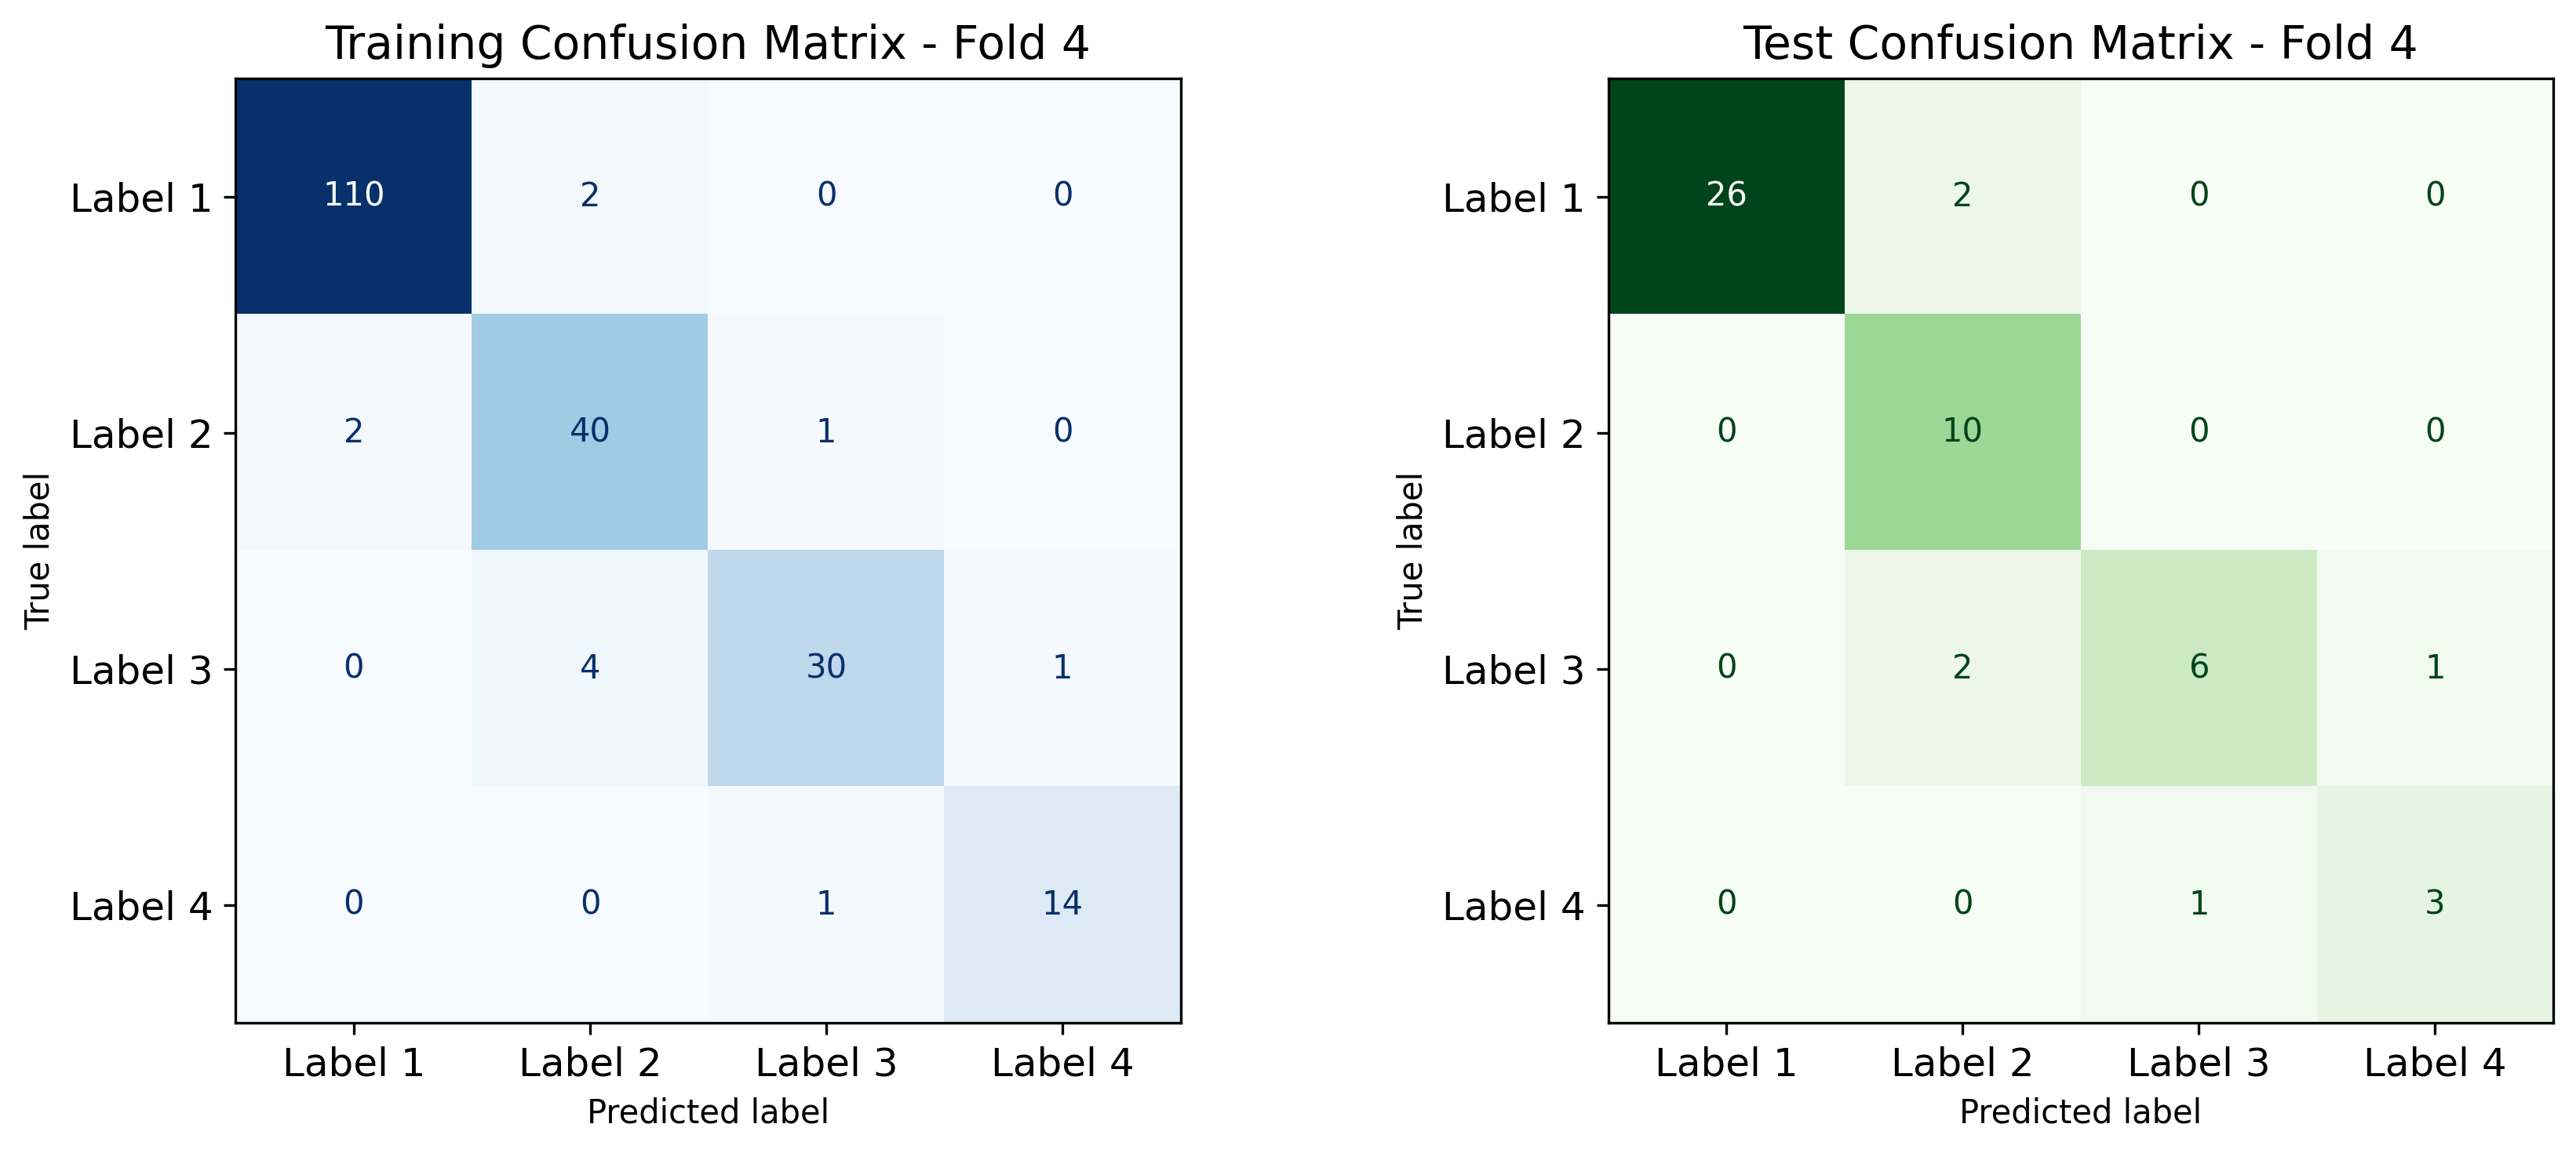


Fold 5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 205, number of used features: 2
[LightGBM] [Info] Start training from score -0.604511
[LightGBM] [Info] Start training from score -1.561810
[LightGBM] [Info] Start training from score -1.767662
[LightGBM] [Info] Start training from score -2.614960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

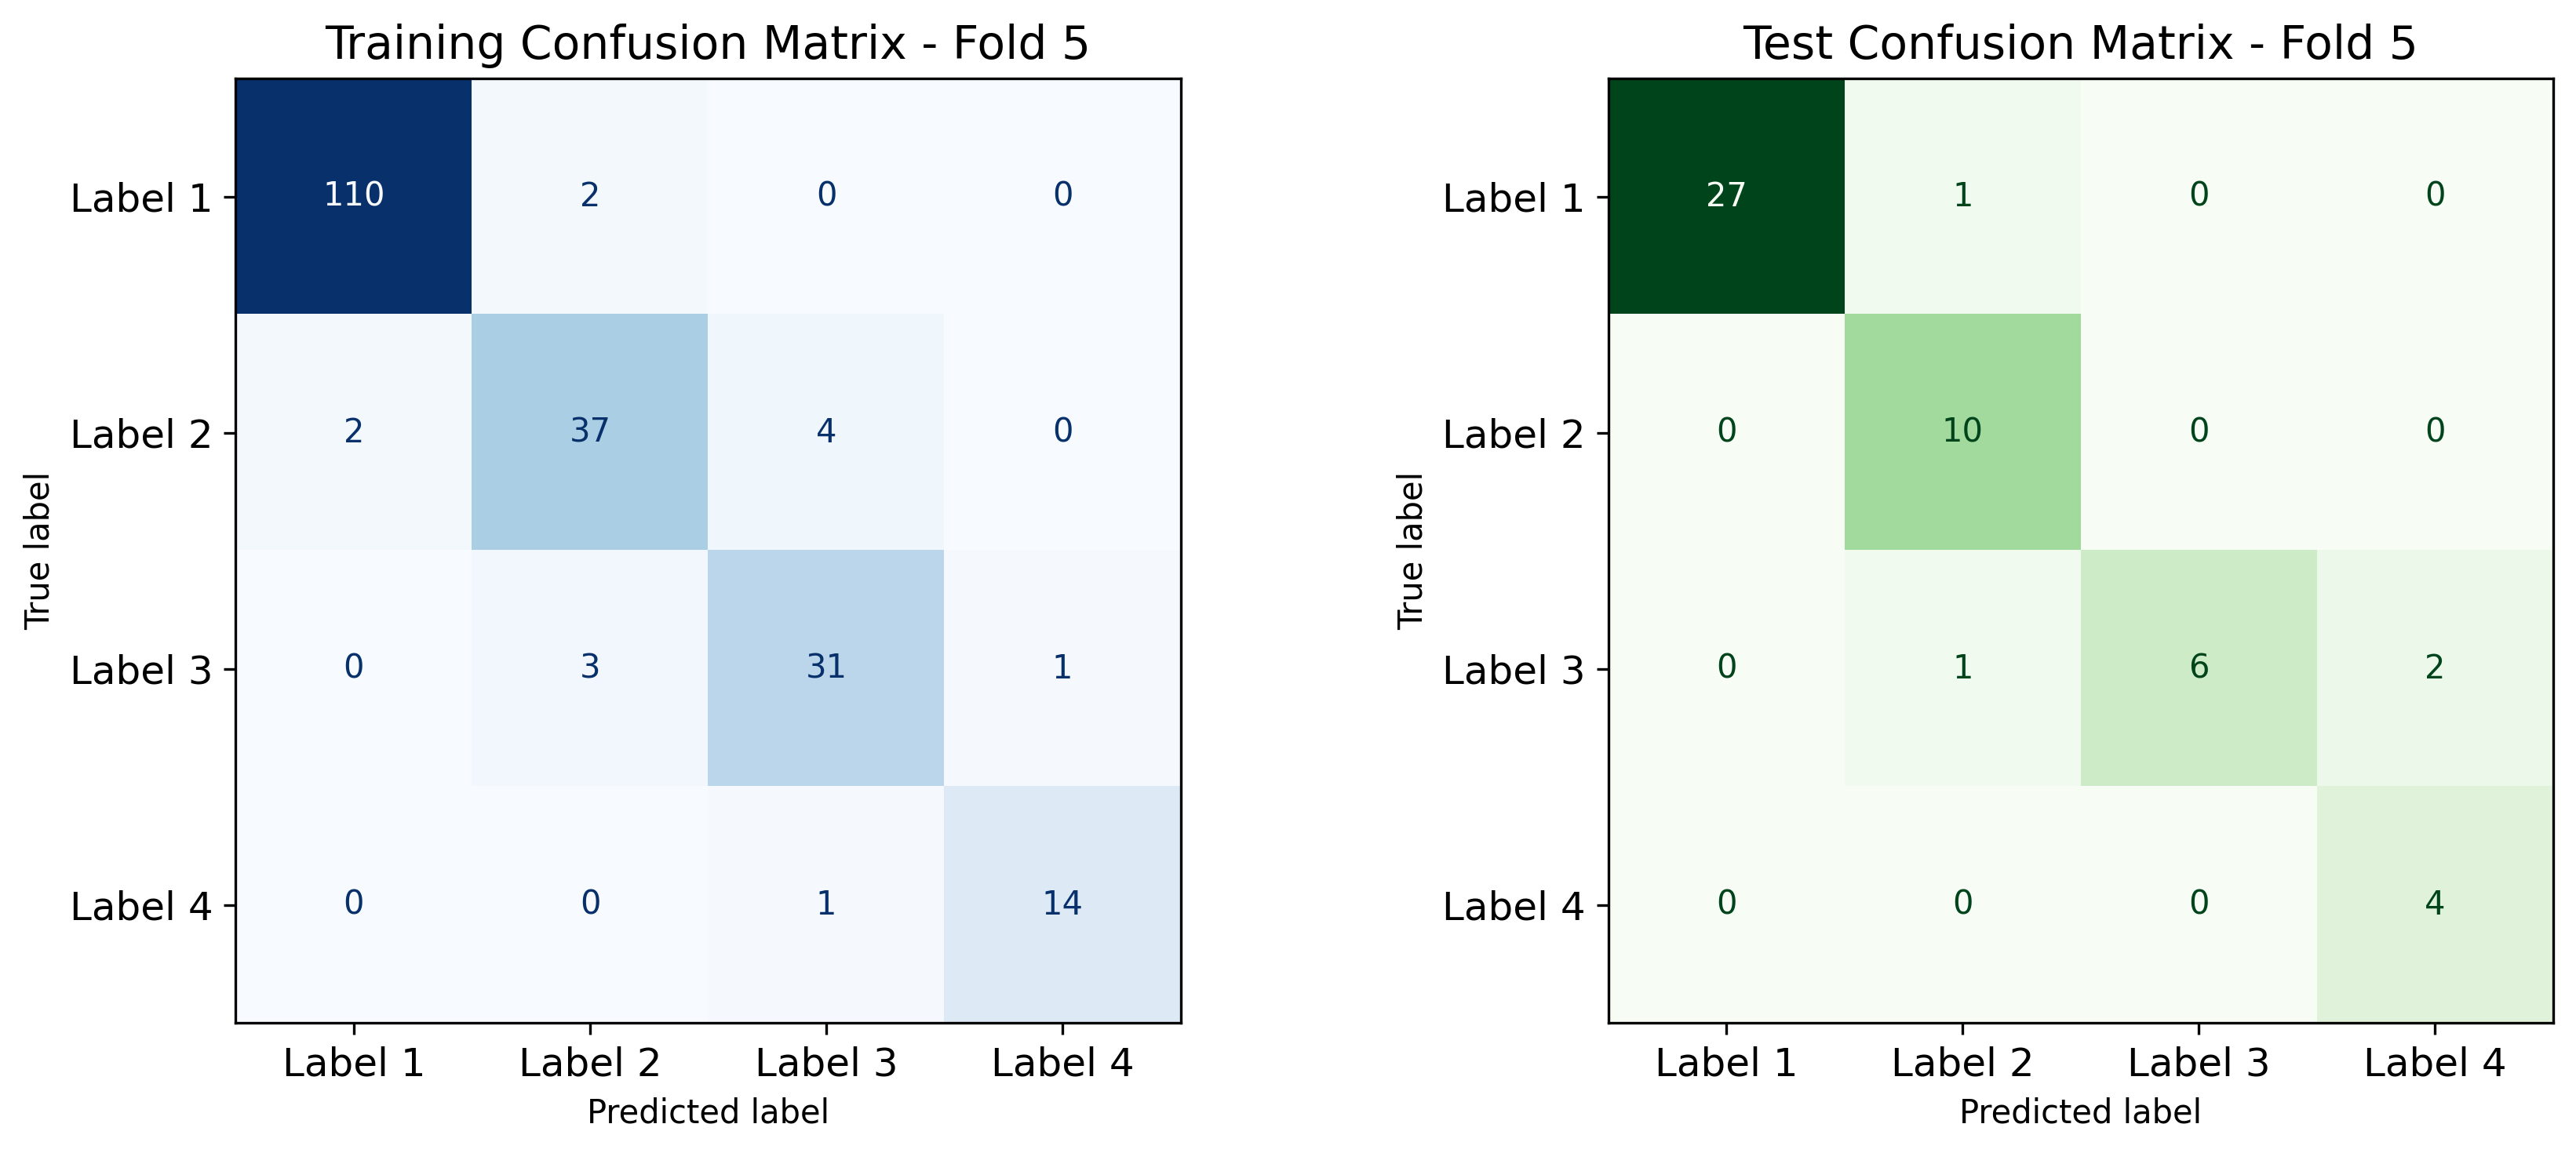

In [ ]:
fold = 1
for train_index, test_index in skf.split(X2, y2):
  print(f"\nFold {fold}")
  # Use X2 and y2 for classification
  X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]
  y_train2, y_test2 = y2.iloc[train_index], y2.iloc[test_index]

  # Train the model
  model = LGBMClassifier(random_state=42)
  model.fit(X_train2, y_train2)

  # Predictions
  y_train_pred = model.predict(X_train2)
  y_test_pred = model.predict(X_test2)

  # Classification report
  print("Training Classification Report:")
  print(classification_report(y_train2, y_train_pred))
  print("Testing Classification Report:")
  print(classification_report(y_test2, y_test_pred))

  # Confusion Matrices with improved visualization
  fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=300) # Increased DPI for higher quality

  # Get unique classes for dynamic display labels
  unique_classes = np.unique(np.concatenate([y_train2, y_test2]))
  display_labels = [f'Label {cls}' for cls in unique_classes]

  ConfusionMatrixDisplay.from_estimator(
       model, X_train2, y_train2, ax=axes[0], cmap='Blues', colorbar=False,
       values_format=".0f", display_labels=display_labels
    )
  axes[0].set_title(f"Training Confusion Matrix - Fold {fold}", fontsize=14)  # Increased fontsize
  axes[0].tick_params(axis='both', labelsize=12) # increased tick label font size


  ConfusionMatrixDisplay.from_estimator(
       model, X_test2, y_test2, ax=axes[1], cmap='Greens', colorbar=False,
       values_format=".0f", display_labels=display_labels
    )
  axes[1].set_title(f"Test Confusion Matrix - Fold {fold}", fontsize=14)
  axes[1].tick_params(axis='both', labelsize=12) # increased tick label font size


  plt.tight_layout()
  plt.savefig(f"confusion_matrix_fold_{fold}.png", dpi=300, bbox_inches='tight') # Save with high dpi
  plt.show()

  fold += 1

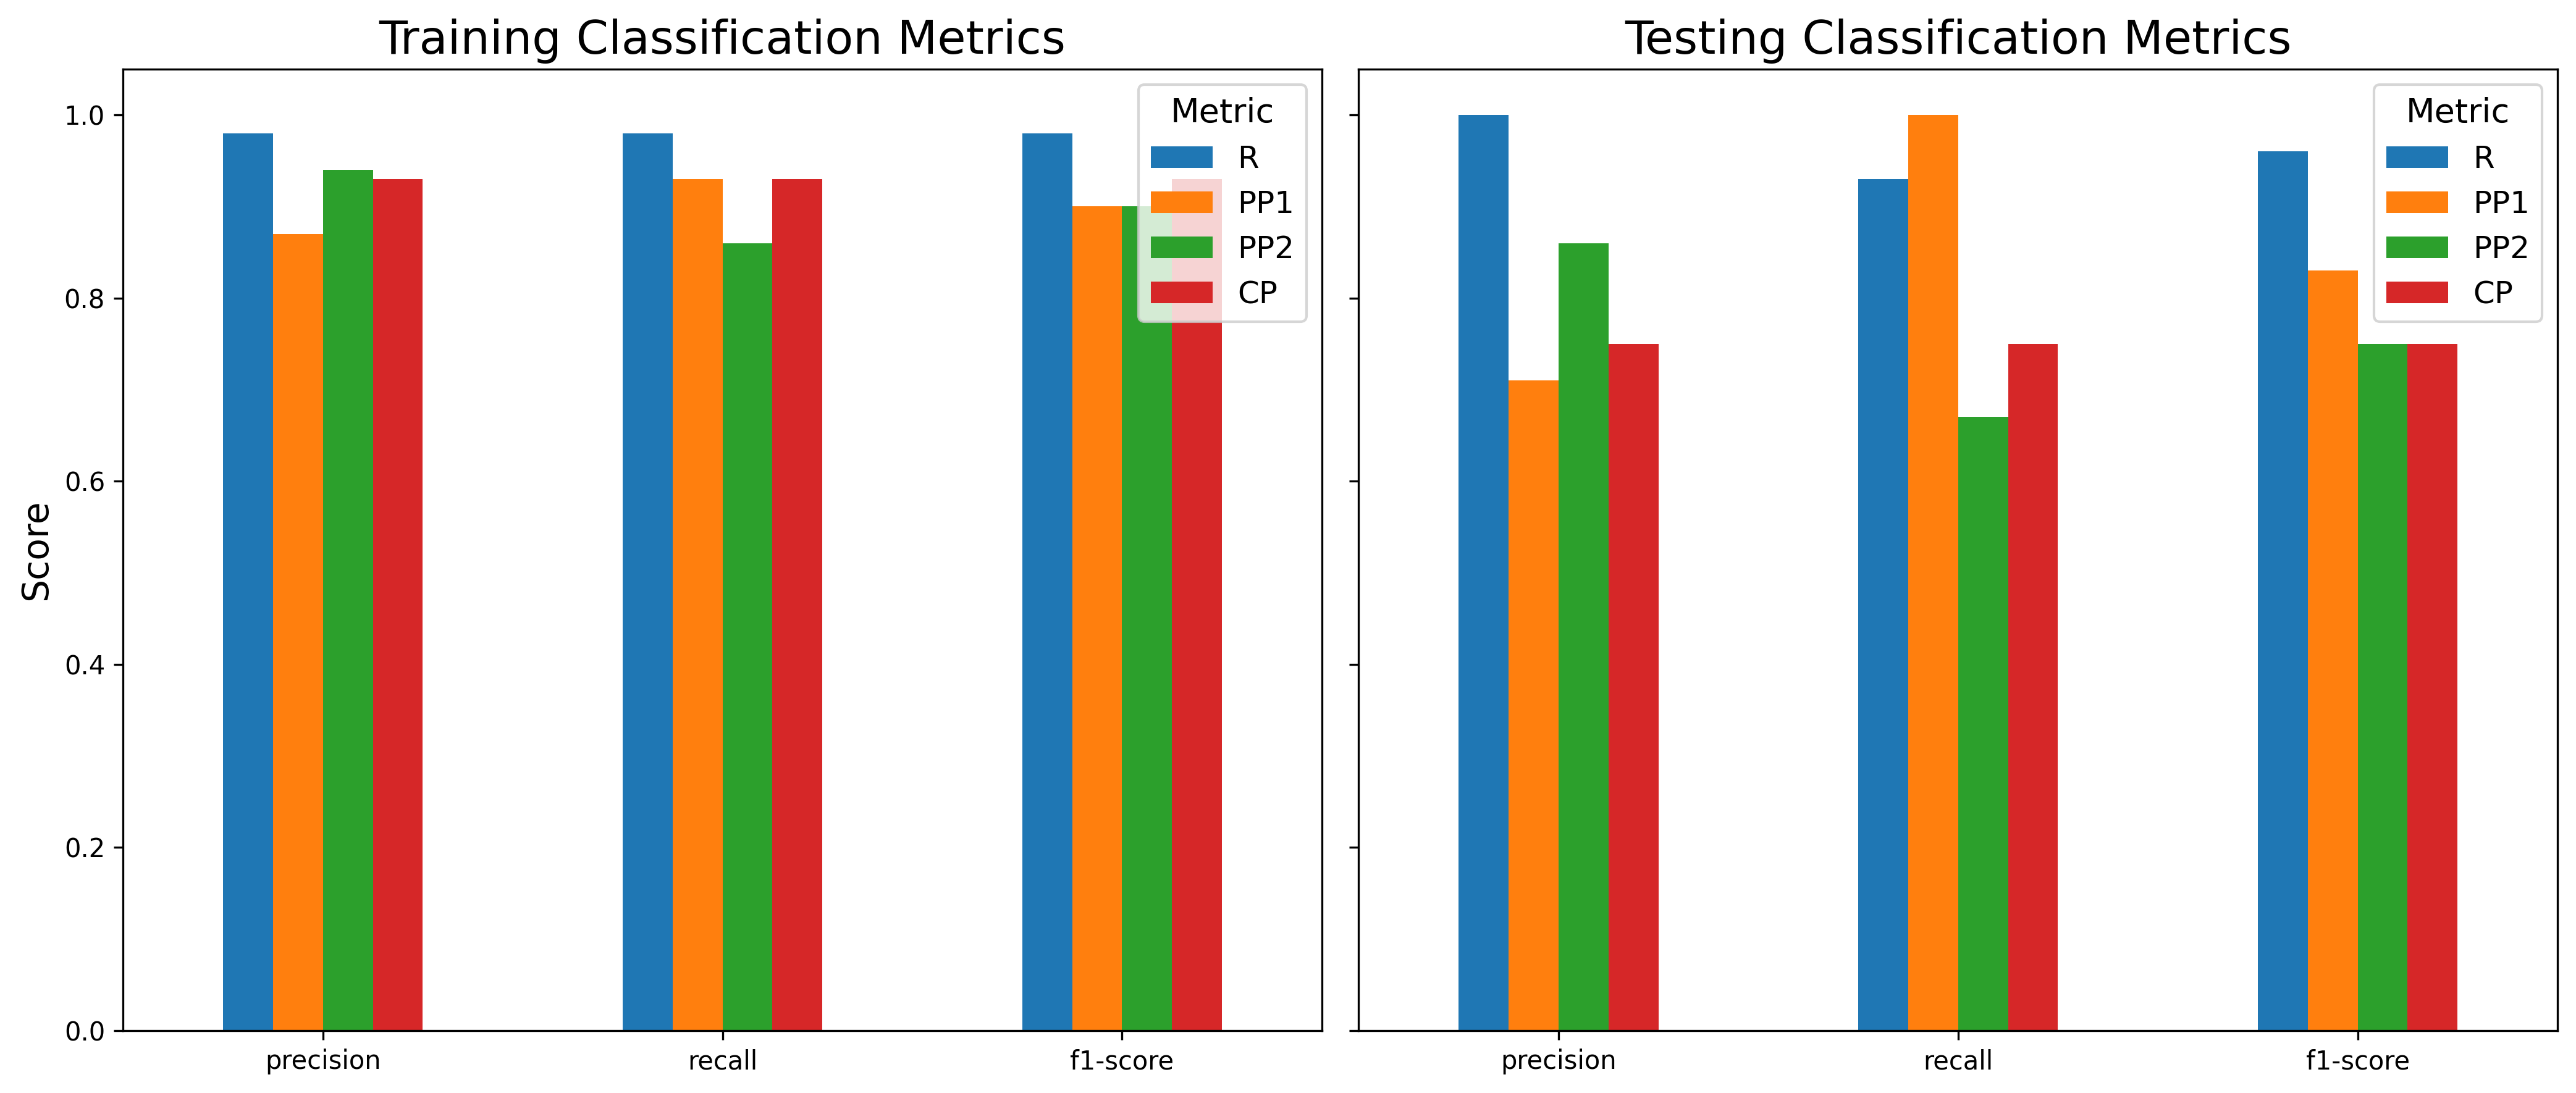

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the data
classes = ['R', 'PP1', 'PP2', 'PP4']
metrics = ['precision', 'recall', 'f1-score']

training_data = {
    'R': [0.98, 0.98, 0.98],
    'PP1': [0.87, 0.93, 0.90],
    'PP2': [0.94, 0.86, 0.90],
    'CP': [0.93, 0.93, 0.93]
}

testing_data = {
    'R': [1.00, 0.93, 0.96],
    'PP1': [0.71, 1.00, 0.83],
    'PP2': [0.86, 0.67, 0.75],
    'CP': [0.75, 0.75, 0.75]
}

# Convert to DataFrames
training_df = pd.DataFrame(training_data, index=metrics)
testing_df = pd.DataFrame(testing_data, index=metrics)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True, dpi=300)

# Plot training
training_df.plot(kind='bar', ax=axes[0])
axes[0].set_title('Training Classification Metrics', fontsize=18)
axes[0].set_ylabel('Score', fontsize=14)
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(title='Metric', fontsize=12, title_fontsize=13)
axes[0].set_ylim(0, 1.05)

# Plot testing
testing_df.plot(kind='bar', ax=axes[1])
axes[1].set_title('Testing Classification Metrics', fontsize=18)
axes[1].tick_params(axis='x', rotation=0)
axes[1].legend(title='Metric', fontsize=12, title_fontsize=13)
axes[1].set_ylim(0, 1.05)

# Tight layout
plt.tight_layout()

# Save figure (optional)
# plt.savefig("classification_metrics.png", dpi=300, bbox_inches='tight')
# plt.savefig("classification_metrics.pdf", bbox_inches='tight')

plt.show()